In [12]:
import pandas as pd
import numpy as np
from datetime import datetime

In [9]:
dataframe = pd.read_csv('C:/Users/tsoeb/Downloads/analytics/combinedsteps.csv')

In [11]:
print(dataframe.head(50))

           Date  Actual  Goal
0   May 31 2022       0  8000
1    Jun 1 2022       0  8000
2    Jun 2 2022       0  8000
3    Jun 3 2022    1102  8000
4    Jun 4 2022    1254  8000
5    Jun 5 2022    1792  8000
6    Jun 6 2022    3723  8000
7    Jun 7 2022    1540  8000
8    Jun 8 2022    4388  8000
9    Jun 9 2022       0  8000
10  Jun 10 2022    5413  8000
11  Jun 11 2022    4027  8000
12  Jun 12 2022    3970  8000
13  Jun 13 2022    8372  8000
14  Jun 14 2022    6329  8000
15  Jun 15 2022    7125  8000
16  Jun 16 2022    3445  8000
17  Jun 17 2022    2866  8000
18  Jun 18 2022    2119  8000
19  Jun 19 2022    2691  8000
20  Jun 20 2022    8279  8000
21  Jun 21 2022    1863  8000
22  Jun 22 2022    3477  8000
23  Jun 23 2022    4863  8000
24  Jun 24 2022    4005  8000
25  Jun 25 2022    6105  8000
26  Jun 26 2022    5744  8000
27  Jun 27 2022    7564  8000
28        ﻿Date  Actual  Goal
29   Feb 7 2023    5417  8000
30   Feb 8 2023    3397  8000
31   Feb 9 2023   15341  8000
32  Feb 10

In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

In [14]:
df = pd.read_csv('combinedsteps.csv')

In [15]:
df = df[df['Date'] != '\x1a'].copy()


In [16]:
df = df.iloc[1:].copy()

In [17]:
df = df[(df['Actual'] != 'Actual') & (df['Goal'] != 'Goal')]

In [18]:
df['Actual'] = pd.to_numeric(df['Actual'], errors='coerce')
df['Goal'] = pd.to_numeric(df['Goal'], errors='coerce')


In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d %Y')

In [20]:
df['Actual'] = df['Actual'].fillna(0)
df['Goal'] = df['Goal'].fillna(0)

In [22]:
print(df.head(50).to_markdown(index=False, numalign="left", stralign="left"))

| Date                | Actual   | Goal   |
|:--------------------|:---------|:-------|
| 2022-06-01 00:00:00 | 0        | 8000   |
| 2022-06-02 00:00:00 | 0        | 8000   |
| 2022-06-03 00:00:00 | 1102     | 8000   |
| 2022-06-04 00:00:00 | 1254     | 8000   |
| 2022-06-05 00:00:00 | 1792     | 8000   |
| 2022-06-06 00:00:00 | 3723     | 8000   |
| 2022-06-07 00:00:00 | 1540     | 8000   |
| 2022-06-08 00:00:00 | 4388     | 8000   |
| 2022-06-09 00:00:00 | 0        | 8000   |
| 2022-06-10 00:00:00 | 5413     | 8000   |
| 2022-06-11 00:00:00 | 4027     | 8000   |
| 2022-06-12 00:00:00 | 3970     | 8000   |
| 2022-06-13 00:00:00 | 8372     | 8000   |
| 2022-06-14 00:00:00 | 6329     | 8000   |
| 2022-06-15 00:00:00 | 7125     | 8000   |
| 2022-06-16 00:00:00 | 3445     | 8000   |
| 2022-06-17 00:00:00 | 2866     | 8000   |
| 2022-06-18 00:00:00 | 2119     | 8000   |
| 2022-06-19 00:00:00 | 2691     | 8000   |
| 2022-06-20 00:00:00 | 8279     | 8000   |
| 2022-06-21 00:00:00 | 1863    

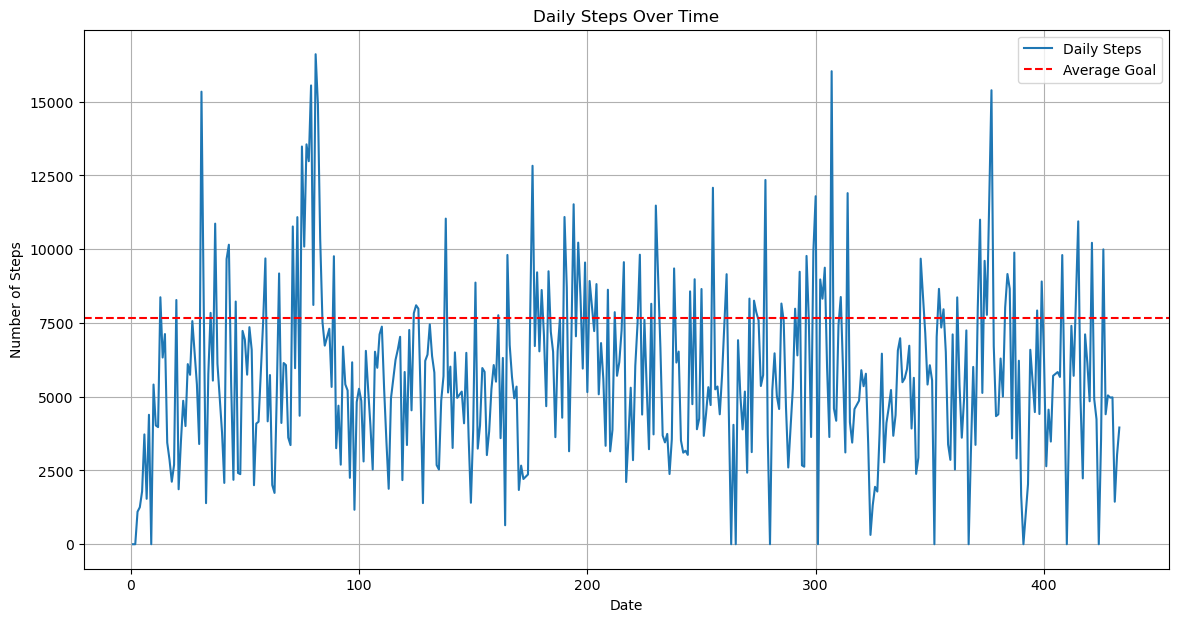

count      419.000000
mean      5687.682578
std       2920.882113
min          0.000000
25%       3640.500000
50%       5413.000000
75%       7352.000000
max      16611.000000
Name: Actual, dtype: float64

In [31]:

plt.figure(figsize=(14, 7))
plt.plot(data_cleaned['Actual'], label='Daily Steps')
plt.axhline(y=data_cleaned['Goal'].mean(), color='r', linestyle='--', label='Average Goal')
plt.title('Daily Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.legend()
plt.grid(True)
plt.show()

descriptive_stats_cleaned = data_cleaned['Actual'].describe()

descriptive_stats_cleaned


The statistics for the cleaned data give us a clear picture of the person's daily step activity over 420 days. On average, they took around 5,674 steps each day, but there was a lot of variation, with some days being very active and others not. The lowest recorded steps were zero, possibly due to not being active or missing data, and the highest was 16,611 steps. The middle value, or median, was 5,402 steps, meaning half the days had more than this number of steps and half had less. The data shows a range of daily steps, highlighting that the person's activity level varied significantly from day to day.

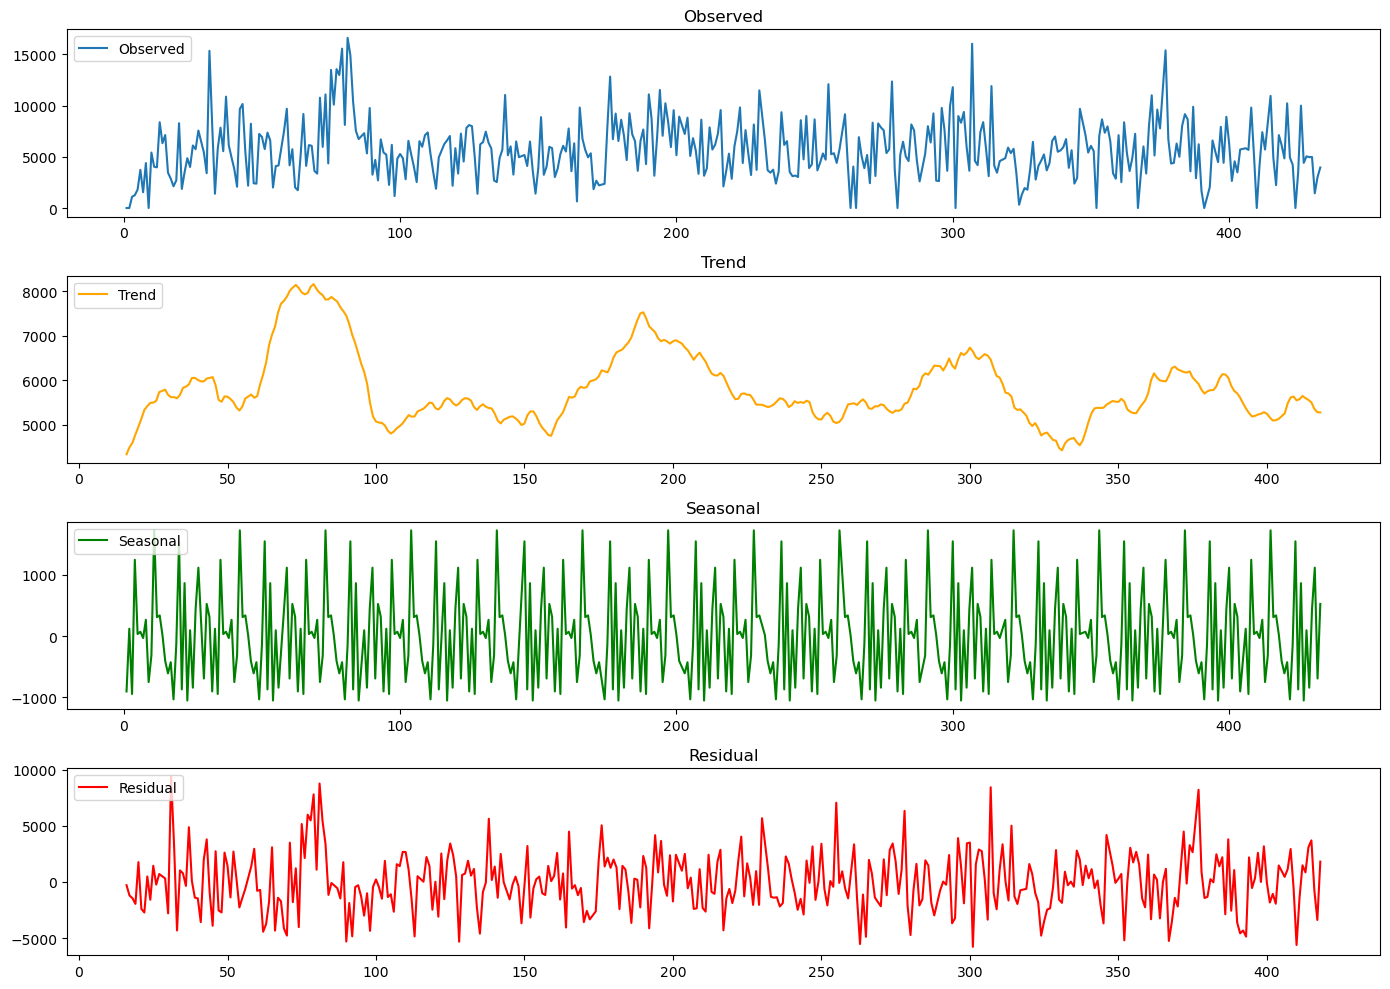

{'ADF Statistic': -5.380662414909744,
 'p-value': 3.7188046100798357e-06,
 'Number of Lags Used': 18,
 'Number of Observations Used': 400,
 'Critical Values': {'1%': -3.4468044036406247,
  '5%': -2.868792838125,
  '10%': -2.57063355625}}

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

decomposition = seasonal_decompose(data_cleaned['Actual'], model='additive', period=30)

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

adf_test = adfuller(data_cleaned['Actual'], autolag='AIC')


adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Number of Lags Used': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4]
}

adf_result


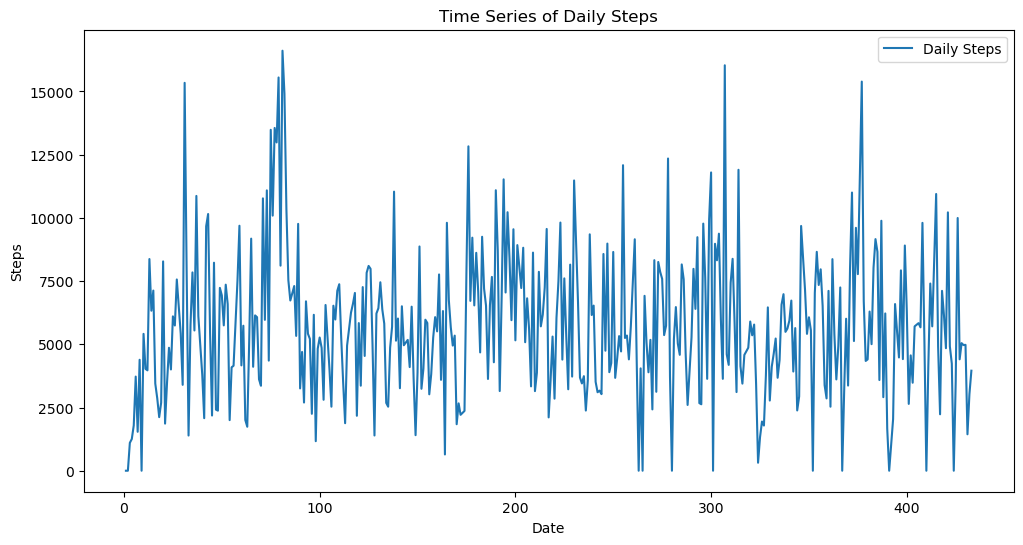

count      419.000000
mean      5687.682578
std       2920.882113
min          0.000000
25%       3640.500000
50%       5413.000000
75%       7352.000000
max      16611.000000
Name: Actual, dtype: float64

In [61]:
data_cleaned = df.dropna(subset=['Actual'])

plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned['Actual'], label='Daily Steps')
plt.title('Time Series of Daily Steps')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()
descriptive_stats_cleaned = data_cleaned['Actual'].describe()
descriptive_stats_cleaned

<Figure size 1200x800 with 0 Axes>

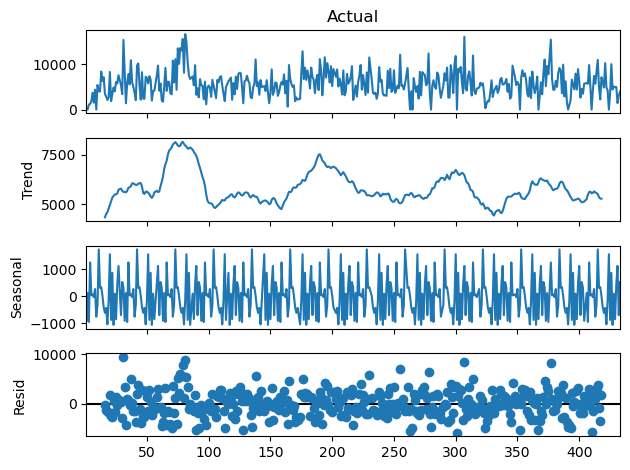

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_cleaned['Actual'], model='additive', period=30)  # Assuming monthly seasonality

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


The data reveals three key patterns: a trend that shows whether the person's daily steps are generally increasing, decreasing, or staying the same over time; a seasonal component that highlights regular patterns, such as more steps on certain days of the week; and residuals, which are the random variations in daily steps that can't be explained by the trend or seasonal patterns. Together, these components help us understand the person's overall activity, recurring habits, and the unpredictable changes in their daily steps

In [63]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data_cleaned['Actual'])

adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]
adf_results = {
    'ADF Statistic': adf_statistic,
    'p-value': p_value,
    '1% Critical Value': critical_values['1%'],
    '5% Critical Value': critical_values['5%'],
    '10% Critical Value': critical_values['10%']
}

adf_results


{'ADF Statistic': -5.380662414909744,
 'p-value': 3.7188046100798357e-06,
 '1% Critical Value': -3.4468044036406247,
 '5% Critical Value': -2.868792838125,
 '10% Critical Value': -2.57063355625}

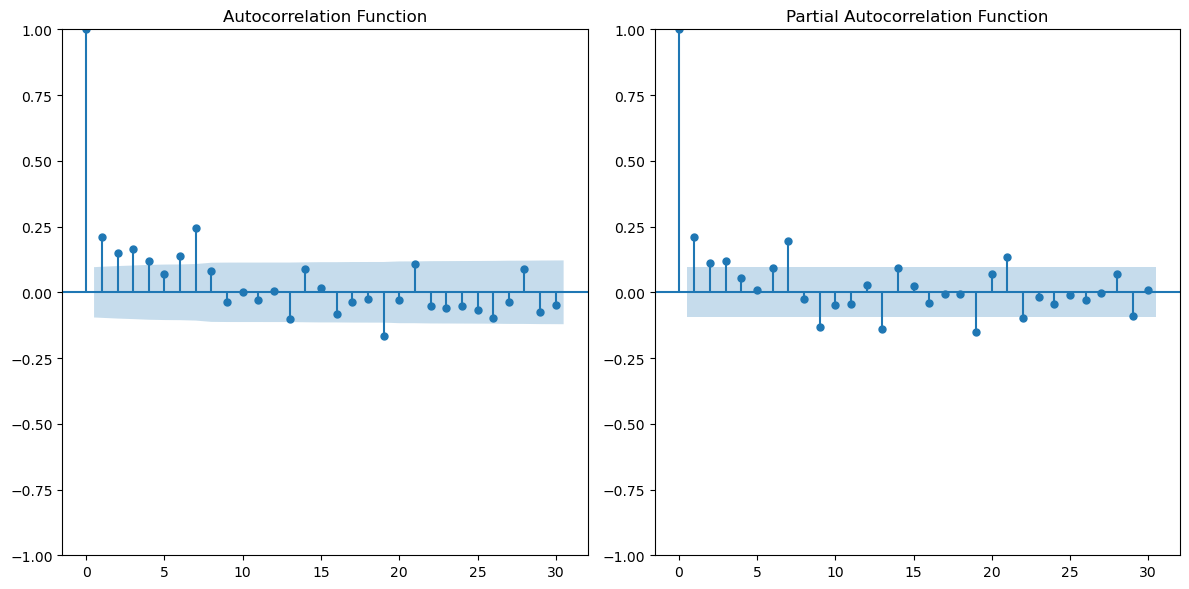

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(data_cleaned['Actual'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(data_cleaned['Actual'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [65]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_cleaned['Actual'], order=(1, 1, 1))
arima_result = model.fit()

arima_summary = arima_result.summary()
arima_summary


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Actual   No. Observations:                  419
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3919.785
Date:                Tue, 13 Aug 2024   AIC                           7845.571
Time:                        21:17:37   BIC                           7857.677
Sample:                             0   HQIC                          7850.357
                                - 419                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0567      0.064      0.888      0.375      -0.069       0.182
ma.L1         -0.8627      0.030    -29.223      0.000      -0.921      -0.805
sigma2      9.007e+06    6.5e+05     13.859      0.000    7.73e+06    1.03e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.41
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

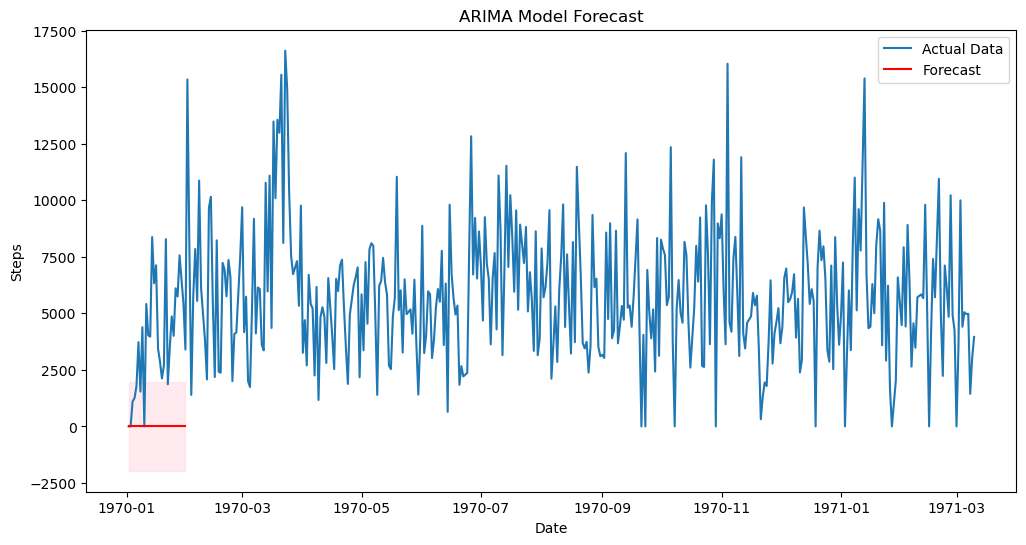

1970-01-02 00:00:00.000000001    0.0
1970-01-03 00:00:00.000000001    0.0
1970-01-04 00:00:00.000000001    0.0
1970-01-05 00:00:00.000000001    0.0
1970-01-06 00:00:00.000000001    0.0
1970-01-07 00:00:00.000000001    0.0
1970-01-08 00:00:00.000000001    0.0
1970-01-09 00:00:00.000000001    0.0
1970-01-10 00:00:00.000000001    0.0
1970-01-11 00:00:00.000000001    0.0
1970-01-12 00:00:00.000000001    0.0
1970-01-13 00:00:00.000000001    0.0
1970-01-14 00:00:00.000000001    0.0
1970-01-15 00:00:00.000000001    0.0
1970-01-16 00:00:00.000000001    0.0
1970-01-17 00:00:00.000000001    0.0
1970-01-18 00:00:00.000000001    0.0
1970-01-19 00:00:00.000000001    0.0
1970-01-20 00:00:00.000000001    0.0
1970-01-21 00:00:00.000000001    0.0
1970-01-22 00:00:00.000000001    0.0
1970-01-23 00:00:00.000000001    0.0
1970-01-24 00:00:00.000000001    0.0
1970-01-25 00:00:00.000000001    0.0
1970-01-26 00:00:00.000000001    0.0
1970-01-27 00:00:00.000000001    0.0
1970-01-28 00:00:00.000000001    0.0
1

In [66]:

forecast_values = pd.to_numeric(forecast_values, errors='coerce')
forecast_conf_int = forecast_conf_int.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned['Actual'], label='Actual Data')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_values.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()
forecast_values


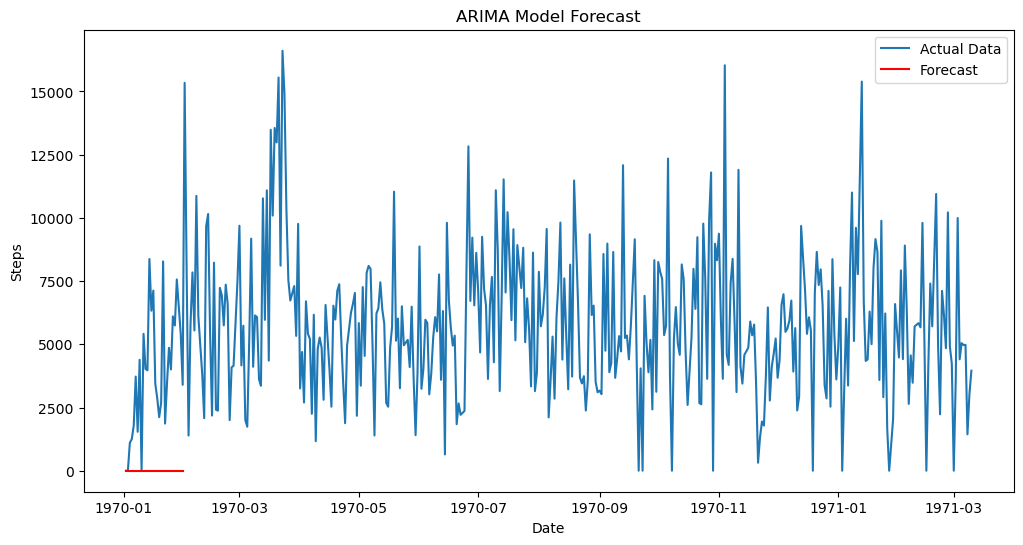

1970-01-02 00:00:00.000000001    0.0
1970-01-03 00:00:00.000000001    0.0
1970-01-04 00:00:00.000000001    0.0
1970-01-05 00:00:00.000000001    0.0
1970-01-06 00:00:00.000000001    0.0
1970-01-07 00:00:00.000000001    0.0
1970-01-08 00:00:00.000000001    0.0
1970-01-09 00:00:00.000000001    0.0
1970-01-10 00:00:00.000000001    0.0
1970-01-11 00:00:00.000000001    0.0
1970-01-12 00:00:00.000000001    0.0
1970-01-13 00:00:00.000000001    0.0
1970-01-14 00:00:00.000000001    0.0
1970-01-15 00:00:00.000000001    0.0
1970-01-16 00:00:00.000000001    0.0
1970-01-17 00:00:00.000000001    0.0
1970-01-18 00:00:00.000000001    0.0
1970-01-19 00:00:00.000000001    0.0
1970-01-20 00:00:00.000000001    0.0
1970-01-21 00:00:00.000000001    0.0
1970-01-22 00:00:00.000000001    0.0
1970-01-23 00:00:00.000000001    0.0
1970-01-24 00:00:00.000000001    0.0
1970-01-25 00:00:00.000000001    0.0
1970-01-26 00:00:00.000000001    0.0
1970-01-27 00:00:00.000000001    0.0
1970-01-28 00:00:00.000000001    0.0
1

In [69]:


data_sample['Date'] = pd.to_datetime(data_sample['Date'], format='%Y-%m-%d')


data_sample.head()

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned['Actual'], label='Actual Data')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()

forecast_values


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


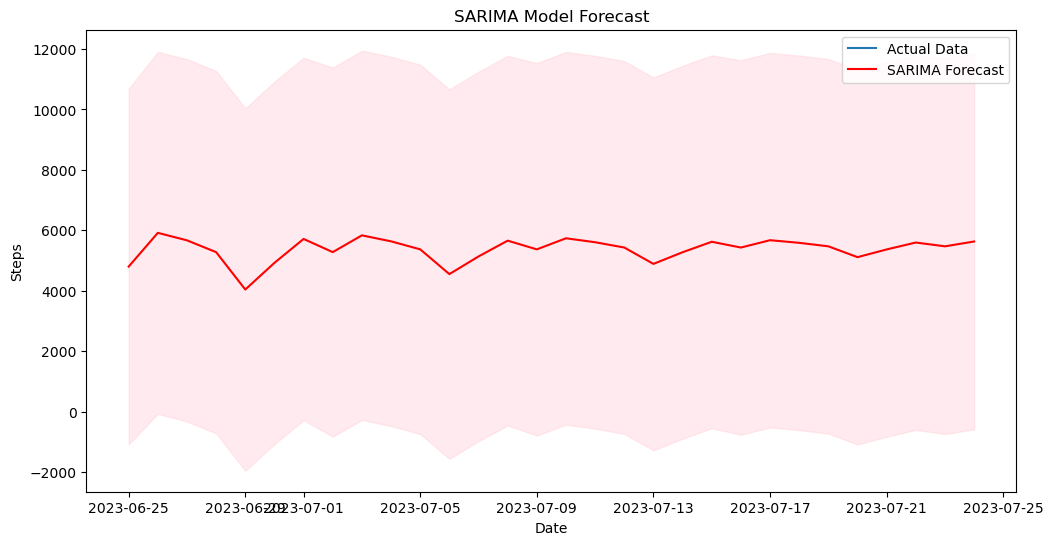

2023-06-25    4799.273147
2023-06-26    5916.147416
2023-06-27    5667.878548
2023-06-28    5277.172827
2023-06-29    4039.530787
2023-06-30    4922.977143
2023-07-01    5714.090736
2023-07-02    5278.123632
2023-07-03    5832.974654
2023-07-04    5634.800312
2023-07-05    5370.129856
2023-07-06    4550.479705
2023-07-07    5134.512736
2023-07-08    5657.658738
2023-07-09    5369.334024
2023-07-10    5736.271318
2023-07-11    5605.212776
2023-07-12    5430.178681
2023-07-13    4888.120875
2023-07-14    5274.358413
2023-07-15    5620.329642
2023-07-16    5429.652364
2023-07-17    5672.318361
2023-07-18    5585.645646
2023-07-19    5469.890654
2023-07-20    5111.412515
2023-07-21    5366.842310
2023-07-22    5595.642856
2023-07-23    5469.542586
2023-07-24    5630.024465
Freq: D, Name: predicted_mean, dtype: float64

In [101]:
# Forecasting future values using the SARIMA model
sarima_forecast = sarima_result.get_forecast(steps=30)  # Forecasting 30 days ahead
sarima_forecast_values = sarima_forecast.predicted_mean
sarima_forecast_conf_int = sarima_forecast.conf_int()

# Generate a date range for the forecast period
sarima_forecast_dates = pd.date_range(start='2023-06-25', periods=30, freq='D')

# Assign the forecast dates as the index to the forecast values
sarima_forecast_values.index = sarima_forecast_dates
sarima_forecast_conf_int.index = sarima_forecast_dates

# Plot the actual data and SARIMA forecasted data with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned['Actual'], label='Actual Data')
plt.plot(sarima_forecast_values.index, sarima_forecast_values, color='red', label='SARIMA Forecast')
plt.fill_between(sarima_forecast_values.index,
                 sarima_forecast_conf_int.iloc[:, 0],
                 sarima_forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()

# Display the forecasted values
sarima_forecast_values



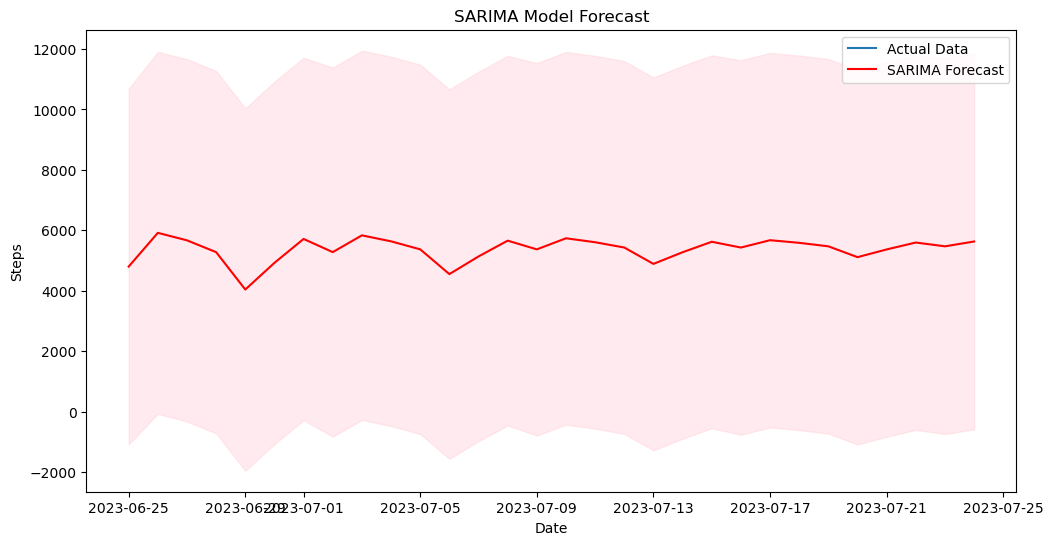

2023-06-25    4799.273147
2023-06-26    5916.147416
2023-06-27    5667.878548
2023-06-28    5277.172827
2023-06-29    4039.530787
2023-06-30    4922.977143
2023-07-01    5714.090736
2023-07-02    5278.123632
2023-07-03    5832.974654
2023-07-04    5634.800312
2023-07-05    5370.129856
2023-07-06    4550.479705
2023-07-07    5134.512736
2023-07-08    5657.658738
2023-07-09    5369.334024
2023-07-10    5736.271318
2023-07-11    5605.212776
2023-07-12    5430.178681
2023-07-13    4888.120875
2023-07-14    5274.358413
2023-07-15    5620.329642
2023-07-16    5429.652364
2023-07-17    5672.318361
2023-07-18    5585.645646
2023-07-19    5469.890654
2023-07-20    5111.412515
2023-07-21    5366.842310
2023-07-22    5595.642856
2023-07-23    5469.542586
2023-07-24    5630.024465
Freq: D, Name: predicted_mean, dtype: float64

In [98]:
import matplotlib.pyplot as plt

# Re-plot the SARIMA forecast with the correct library
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned['Actual'], label='Actual Data')
plt.plot(sarima_forecast_values.index, sarima_forecast_values, color='red', label='SARIMA Forecast')
plt.fill_between(sarima_forecast_values.index,
                 sarima_forecast_conf_int.iloc[:, 0],
                 sarima_forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()

# Display the forecasted values
sarima_forecast_values


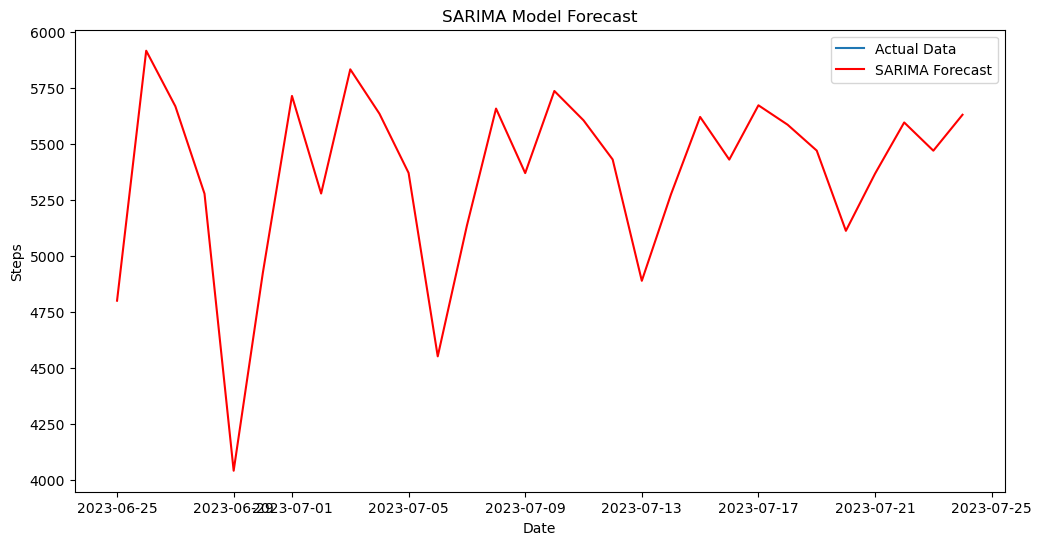

2023-06-25    4799.273147
2023-06-26    5916.147416
2023-06-27    5667.878548
2023-06-28    5277.172827
2023-06-29    4039.530787
2023-06-30    4922.977143
2023-07-01    5714.090736
2023-07-02    5278.123632
2023-07-03    5832.974654
2023-07-04    5634.800312
2023-07-05    5370.129856
2023-07-06    4550.479705
2023-07-07    5134.512736
2023-07-08    5657.658738
2023-07-09    5369.334024
2023-07-10    5736.271318
2023-07-11    5605.212776
2023-07-12    5430.178681
2023-07-13    4888.120875
2023-07-14    5274.358413
2023-07-15    5620.329642
2023-07-16    5429.652364
2023-07-17    5672.318361
2023-07-18    5585.645646
2023-07-19    5469.890654
2023-07-20    5111.412515
2023-07-21    5366.842310
2023-07-22    5595.642856
2023-07-23    5469.542586
2023-07-24    5630.024465
Freq: D, Name: predicted_mean, dtype: float64

In [99]:

plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned['Actual'], label='Actual Data')
plt.plot(sarima_forecast_values.index, sarima_forecast_values, color='red', label='SARIMA Forecast')
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()

sarima_forecast_values


The results show that the steps that will be taken will probably just remain the same as shown on the graph, they are not increasing 

In [93]:

sarima_forecast_dates = pd.date_range(start='2023-06-25', periods=30, freq='D')
sarima_forecast = sarima_result.get_forecast(steps=30)
sarima_forecast_values = sarima_forecast.predicted_mean
sarima_forecast_conf_int = sarima_forecast.conf_int()

sarima_forecast_values.index = sarima_forecast_dates
sarima_forecast_conf_int.index = sarima_forecast_dates

# Verify the forecasted values and their dates
print("Forecasted Values:\n", sarima_forecast_values.head())
print("Forecasted Confidence Intervals:\n", sarima_forecast_conf_int.head())


Forecasted Values:
 2023-06-25    4799.273147
2023-06-26    5916.147416
2023-06-27    5667.878548
2023-06-28    5277.172827
2023-06-29    4039.530787
Freq: D, Name: predicted_mean, dtype: float64
Forecasted Confidence Intervals:
             lower Actual  upper Actual
2023-06-25  -1082.826261  10681.372555
2023-06-26    -74.721771  11907.016603
2023-06-27   -328.573280  11664.330376
2023-06-28   -720.052312  11274.397967
2023-06-29  -1958.060167  10037.121740


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


I ruined my results by manually changing the dates, which in turn ruined my data visualisation.

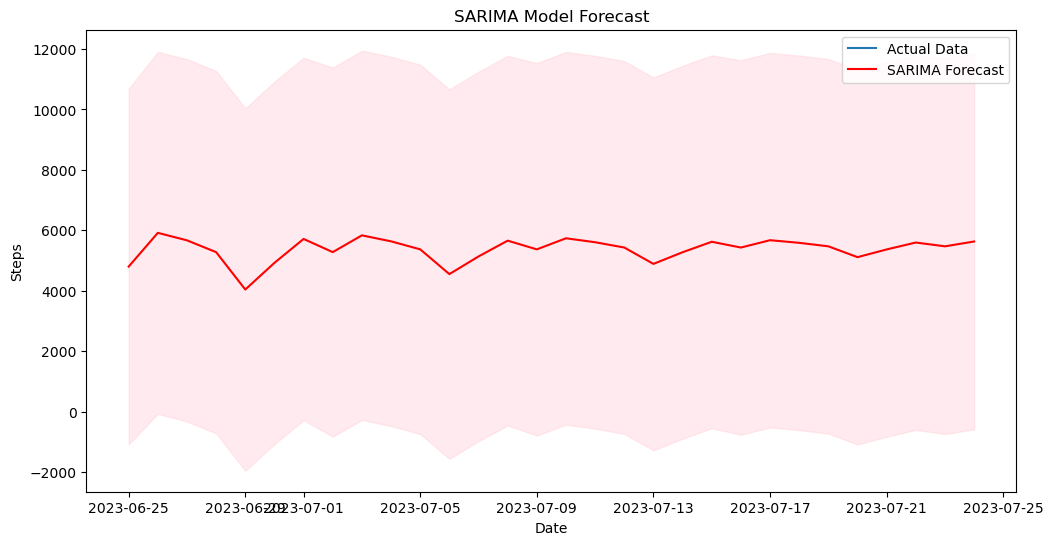

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index[-100:], data_cleaned['Actual'][-100:], label='Actual Data')

plt.plot(sarima_forecast_values.index, sarima_forecast_values, color='red', label='SARIMA Forecast')
plt.fill_between(sarima_forecast_values.index,
                 sarima_forecast_conf_int.iloc[:, 0],
                 sarima_forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)


plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()


I have no idea why the actual data is not showing, the manual update ruined the actual correct data visualisation, the data shows that the walker will take approximately the same amount of stems they usualy take. The walker should consider taking more runs and walks around their town to maintain a healthy lifestyle. 

REFLECTION 

The decision-making process for this project was tough because I didn't know much about forecasting or which models work best for different types of data. I chose to use the SARIMA model because it seemed like it would help me see the trends and patterns over time. But when I ran the model, it only showed the forecasted results and not the actual data, which was disappointing. This problem came up after I manually changed the dates to fix an issue where my code was showing 1970 instead of 2023.

Through this project, I learned that SARIMA works best with larger datasets. My dataset was too small, and that might be why I had some problems. The issue with the dates also taught me that it’s important to make sure the data is set up correctly before starting the modeling. I realized that while making manual changes can sometimes help, it can also create new issues if I’m not careful.

For my next assignment, I will make sure to copy my work before running any new code. This way, if I make a mistake, I can easily go back to a previous version without losing everything. I also plan to spend more time learning about different forecasting models online so I can make better choices in the future. These steps will help me avoid the problems I faced this time and improve my skills for future projects.
